In [ ]:
import pandas as pd
import numpy as np
import sympy as sp
import os 
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE'
#FILENAME = 'Data/president_heights.csv'
#os.chdir(DIR)
#df = pd.read_csv(FILENAME) # read the csv file on to a dataframe 

In [ ]:
def plotVectors(X, ax, vectornames = ''):
  origin = np.array([np.zeros(len(X)), np.zeros(len(X))]) # origin point
  colors = cm.rainbow(np.linspace(0, 1, len(X))) # colors for vectors  
  plt.axvline(0)
  plt.axhline(0)
  ax.quiver(*origin, X[:,0], X[:,1], color = colors,
            angles = 'xy', scale_units ='xy', scale = 1)
  axlim = np.max(abs(X))
  for k in range(0, len(X)):
    if k+1 > len(vectornames):
      name = ''
    else:
      name = vectornames[k]  

In [ ]:
# Simulate a sales dataset
#np.random.seed(100)
nsamples = 1000
df = pd.DataFrame({'Months' : np.arange(1, nsamples+1, 1),
                   'Fixed Cost' : 3000*np.ones(nsamples),
                   'Meals Sold' : np.round(np.random.normal(loc = 3000, scale = 100, size = nsamples)),
                   'Price Per Meal' : np.random.choice([20, 18.50, 16.50, 15],
                                        size = nsamples, replace = True,
                                        p = [.25, .35, .3, .1]),
                   'Profit Per Meal' :' ',
                   'Labor Cost' : np.round(np.random.uniform(low = 5000, high = 7000, size = nsamples)),
                   'Profit' : ' '})
df['Profit Per Meal'] = df['Price Per Meal'] - 11
df['Profit'] = np.round(df['Meals Sold'] * df['Profit Per Meal']  - df['Labor Cost'] - df['Fixed Cost'])        
df.head(10)

,Months,Fixed Cost,Meals Sold,Price Per Meal,Profit Per Meal,Labor Cost,Profit
0,1,3000.0,2993.0,16.5,5.5,5911.0,7550.0
1,2,3000.0,3056.0,16.5,5.5,5549.0,8259.0
2,3,3000.0,3036.0,18.5,7.5,5339.0,14431.0
3,4,3000.0,3116.0,20.0,9.0,6329.0,18715.0
4,5,3000.0,3103.0,20.0,9.0,6611.0,18316.0
5,6,3000.0,3001.0,18.5,7.5,5647.0,13860.0
6,7,3000.0,2914.0,18.5,7.5,5795.0,13060.0
7,8,3000.0,3061.0,15.0,4.0,6728.0,2516.0
8,9,3000.0,3271.0,16.5,5.5,5189.0,9802.0
9,10,3000.0,3103.0,20.0,9.0,5204.0,19723.0


array([[1.       , 0.0366004],
       [0.0366004, 1.       ]])

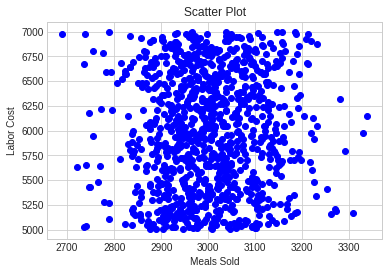

In [ ]:
# How are the meals sold and labor cost related?
# Scatter plot between Meals Sold and Labor Cost
a = df['Meals Sold']
b = df['Labor Cost']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Meals Sold')
ax.set_ylabel('Labor Cost')
ax.set_title('Scatter Plot')
#ax.set_xlim([0, np.max(a)])
#ax.set_ylim([0, np.max(b)])
np.corrcoef(a, b)

In [ ]:
df['Labor Cost'] = np.round(np.random.uniform(low = 6000*(5e-4)*df['Meals Sold'],
                                              high = 7000*(5e-4)*df['Meals Sold'], size = nsamples))
df.head(10)
# Come up with an intuitive connection between Labor Cost and Meals Sold

,Months,Fixed Cost,Meals Sold,Price Per Meal,Profit Per Meal,Labor Cost,Profit
0,1,3000.0,2993.0,16.5,5.5,9613.0,7550.0
1,2,3000.0,3056.0,16.5,5.5,10521.0,8259.0
2,3,3000.0,3036.0,18.5,7.5,9831.0,14431.0
3,4,3000.0,3116.0,20.0,9.0,10691.0,18715.0
4,5,3000.0,3103.0,20.0,9.0,10692.0,18316.0
5,6,3000.0,3001.0,18.5,7.5,9642.0,13860.0
6,7,3000.0,2914.0,18.5,7.5,8782.0,13060.0
7,8,3000.0,3061.0,15.0,4.0,10662.0,2516.0
8,9,3000.0,3271.0,16.5,5.5,10401.0,9802.0
9,10,3000.0,3103.0,20.0,9.0,10789.0,19723.0


[[1.         0.60799919]
 [0.60799919 1.        ]]


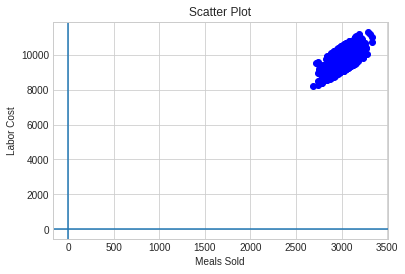

In [ ]:
# How are the meals sold and labor cost related?
# Scatter plot between Meals Sold and Labor Cost
a = df['Meals Sold']
b = df['Labor Cost']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Meals Sold')
ax.set_ylabel('Labor Cost')
ax.set_title('Scatter Plot')
print(np.corrcoef(a, b))
plt.axvline(0)
plt.axhline(0)
#plt.gca().set_aspect('equal')
# Standardize the data and make the scatter plot -> centres the cloud of points
# Set equal scales -> reveal the true picture

99.1137821092506
544.974592287567


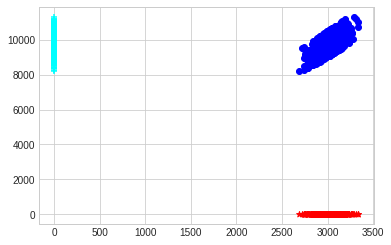

In [ ]:
# Project the samples onto the e1-direction (Meals Sold direction)
e1 = np.array([1, 0])

#print(df[['Meals Sold', 'Labor Cost']].values.shape)
#print(e1.shape)
#print(e1.reshape(-1,1).shape)
projection_meals_sold = np.dot(df[['Meals Sold', 'Labor Cost']].values, e1)

# Project the samples onto the e2-direction (Labor Cost direction)
e2 = np.array([0, 1])
projection_labor_cost = np.dot(df[['Meals Sold', 'Labor Cost']].values, e2)

# Plot the projected versions of the samples
fig, ax = plt.subplots(1)
ax.scatter(df['Meals Sold'], df['Labor Cost'], marker = 'o', color = 'blue' )
ax.scatter(projection_meals_sold*e1[0], projection_meals_sold*e1[1], marker = '*', color = 'red')
ax.scatter(projection_labor_cost*e2[0], projection_labor_cost*e2[1], marker = '+', color = 'cyan')
# Variance along the Meals Sold-direction
print(np.std(projection_meals_sold))
print(np.std(projection_labor_cost))

In [ ]:
# Is this a basis set? Yes. 
# Is this an orthonormal basis set?
v1 = np.array([1, 2, -1])
v2 = np.array([2, 4, 1])
v3 = np.array([-1, 3, 4])

A = sp.Matrix([[1, 2, -1, 0], [2, 4, 3, 0], [-1, 1, 4, 0]])
A.rref()

A = sp.Matrix([[1, 2, -1, -1, 0], [2, 4, -2, 3, 0], [-1, 1, -2, 4, 0]])
A.rref()

# Coordinates of np.array([-1, -2, -2]) w.r.t. the standard basis
a = np.array([-1, -2, -2])
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])
print(np.dot(e1, a))
print(np.dot(e2, a))
print(np.dot(e3, a))

# Coordinates of np.array([-1, -2, -2]) w.r.t. the non-standard (non-orthonormal) basis
x1, x2, x3 = sp.symbols('x1, x2, x3')
A = sp.Matrix([[1, 2, -1, -1], [2, 4, 3, -2], [-1, 1, 4, -2]])
print(sp.linsolve(A, (x1, x2, x3)))
print(np.dot(v1, a))
print(np.dot(v2, a))
print(np.dot(v3, a))

# Gram-Schmidt algorithm
q1 = v1 / np.linalg.norm(v1)
q2 = (v2 - np.dot(q1, v2)*q1) / (np.linalg.norm(v2 - np.dot(q1, v2)*q1))
q3 = (v3 - np.dot(q1, v3)*q1 - np.dot(q2, v3)*q2) / (np.linalg.norm(v3 - np.dot(q1, v3)*q1 - np.dot(q2, v3)*q2))

print(np.linalg.norm(q1))
print(np.linalg.norm(q2))
print(np.linalg.norm(q3))

print(np.dot(q1, q2))
print(np.dot(q1, q3))
print(np.dot(q2, q3))

v_lindep = np.array([-1, -2, -2])
q1 = v1 / np.linalg.norm(v1)
q2 = (v2 - np.dot(q1, v2)*q1) / (np.linalg.norm(v2 - np.dot(q1, v2)*q1))
q3 = (v_lindep - np.dot(q1, v_lindep)*q1 - np.dot(q2, v_lindep)*q2) / (np.linalg.norm(v_lindep - np.dot(q1, v_lindep)*q1 - np.dot(q2, v_lindep)*q2))

-1
-2
-2
{(1, -1, 0)}
-3
-12
-13
1.0
0.9999999999999999
0.9999999999999999
-2.3715711291077823e-16
2.9361716652179014e-16
1.3833701619536933e-16


Meals Sold    2957.0
Labor Cost    9931.0
Name: 0, dtype: float64
10350.026968353342
Meals Sold    2934.0
Labor Cost    9614.0
Name: 1, dtype: float64
10036.728460816834
535.1018830433802


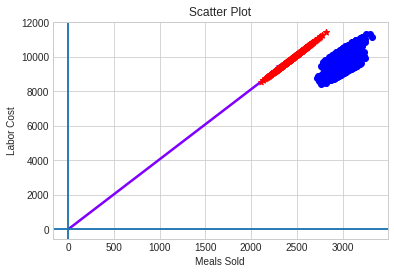

In [ ]:
# How are the meals sold and labor cost related?
# Scatter plot between Meals Sold and Labor Cost
a = df['Meals Sold']
b = df['Labor Cost']
fig, ax = plt.subplots(1)
ax.scatter(a, b, marker = 'o', color = 'blue')
ax.set_xlabel('Meals Sold')
ax.set_ylabel('Labor Cost')
ax.set_title('Scatter Plot')
#ax.set_xlim([0, np.max(a)])
#ax.set_ylim([0, np.max(b)])
np.corrcoef(a, b)
plt.axvline(0)
plt.axhline(0)

# Project data corresponding to meals sold and labor cost
# onto the direction of centroid vector
df_reduced = df.loc[:, ['Meals Sold', 'Labor Cost']]
#q = np.array([np.mean(df['Meals Sold']), np.mean(df['Labor Cost'])])
q = np.array([np.mean(df['Meals Sold'])*0.8, np.mean(df['Labor Cost'])])
#q = np.array([1, 0])
plotVectors(np.array([q]), ax, 'q')
q = q/np.linalg.norm(q) # unit vector (direction)

# Project first sample, that is, calculate the shadow length
# of the first sample vector projected onto q
print(df_reduced.iloc[0, :])
print(np.dot(q, df_reduced.iloc[0, :].values)) # shadow length

# Project second sample, that is, calculate the shadow length
# of the second sample vector projected onto q
print(df_reduced.iloc[1, :])
print(np.dot(q, df_reduced.iloc[1, :].values)) # shadow length

# Project all samples onto the direction of q
shadow_length = df_reduced.apply(lambda x: np.dot(q, x), axis = 1) # x represents each row of the dataframe
#print(shadow_length)
# Plot the projected versions of the samples
ax.scatter(shadow_length*q[0], shadow_length*q[1], marker = '*', color = 'red')

# Project the samples onto a few different directions: q = np.array([1, 0]), np.array([0, 1])
print(np.std(shadow_length))